### Importación de datos



In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
Datos_generales = [tienda, tienda2, tienda3, tienda4]

In [14]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

#1. Análisis de facturación



In [15]:
ingresos_generales = []
i=1
for df in Datos_generales:
  ingresos = df['Precio'].sum()
  ingresos_generales.append(ingresos)
  print(f"Tienda {i} tiene ingreso de {ingresos}")
  i+=1
#De la columna Precio tomo sus valores y los sumo, no tengo que hacer nada adicional porque los valores en esta columna son numericos

Tienda 1 tiene ingreso de 1150880400.0
Tienda 2 tiene ingreso de 1116343500.0
Tienda 3 tiene ingreso de 1098019600.0
Tienda 4 tiene ingreso de 1038375700.0


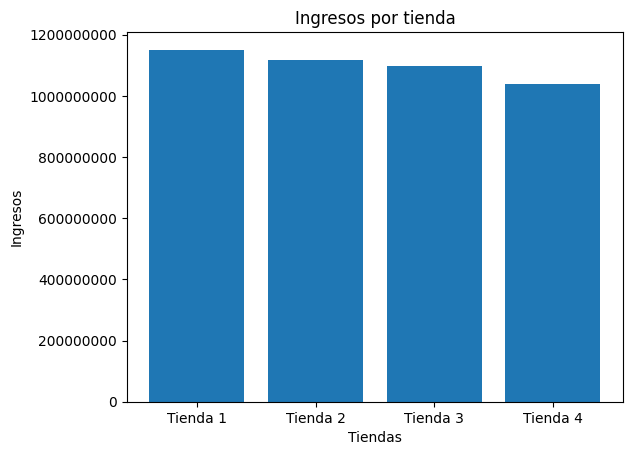

In [16]:
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"] #Agrupo las tiendas en una lista
plt.bar(tiendas, ingresos_generales) #Ploteo los ingresos de cada tienda para tener una visualizacion mas clara de la diferencia de los ingresos entre tiendas
plt.xlabel("Tiendas")
plt.ylabel("Ingresos")
plt.ticklabel_format(axis='y', style='plain')
plt.title("Ingresos por tienda")
plt.show()

# 2. Ventas por categoría

In [17]:
from matplotlib.lines import lineStyles
Conteos_por_categoria = []
Categorias_mas_populares_generales = []
i = 1
for df in Datos_generales:
  Conteo = df["Categoría del Producto"].value_counts()
  Conteos_por_categoria.append(Conteo.head(3))
  categorias_pop = Conteo.head(3).index.tolist()
  Categorias_mas_populares_generales.append(categorias_pop)
  print(f"Tienda {i} tiene {categorias_pop} como categorias mas populares")
  i+=1
print(Categorias_mas_populares_generales)

Tienda 1 tiene ['Muebles', 'Electrónicos', 'Juguetes'] como categorias mas populares
Tienda 2 tiene ['Muebles', 'Electrónicos', 'Juguetes'] como categorias mas populares
Tienda 3 tiene ['Muebles', 'Electrónicos', 'Juguetes'] como categorias mas populares
Tienda 4 tiene ['Muebles', 'Electrónicos', 'Juguetes'] como categorias mas populares
[['Muebles', 'Electrónicos', 'Juguetes'], ['Muebles', 'Electrónicos', 'Juguetes'], ['Muebles', 'Electrónicos', 'Juguetes'], ['Muebles', 'Electrónicos', 'Juguetes']]


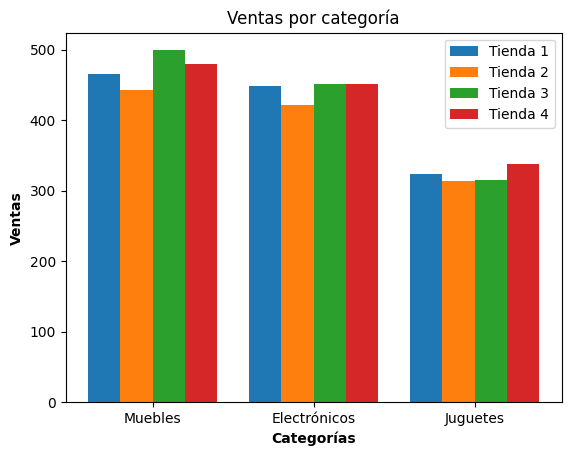

In [18]:
x = np.arange(len(Categorias_mas_populares_generales[0]))
width = 0.2

plt.bar(x - 1.5*width, Conteos_por_categoria[0], width, label='Tienda 1')
plt.bar(x - 0.5*width, Conteos_por_categoria[1], width, label='Tienda 2')
plt.bar(x + 0.5*width, Conteos_por_categoria[2], width, label='Tienda 3')
plt.bar(x + 1.5*width, Conteos_por_categoria[3], width, label='Tienda 4')

plt.xlabel("Categorías", fontweight="bold")
plt.ylabel("Ventas", fontweight="bold")
plt.title("Ventas por categoría")
plt.xticks(x, Categorias_mas_populares_generales[0])  # etiquetas centradas
plt.legend()
plt.show()

# 3. Calificación promedio de la tienda


In [19]:
Calificacion_promedio = []
i = 1
for df in Datos_generales:
  calificacion = df["Calificación"].mean()
  Calificacion_promedio.append(calificacion)
  print(f"Tienda {i} tiene una calificacion promedio de {calificacion:.2f}")
  i+=1

Tienda 1 tiene una calificacion promedio de 3.98
Tienda 2 tiene una calificacion promedio de 4.04
Tienda 3 tiene una calificacion promedio de 4.05
Tienda 4 tiene una calificacion promedio de 4.00


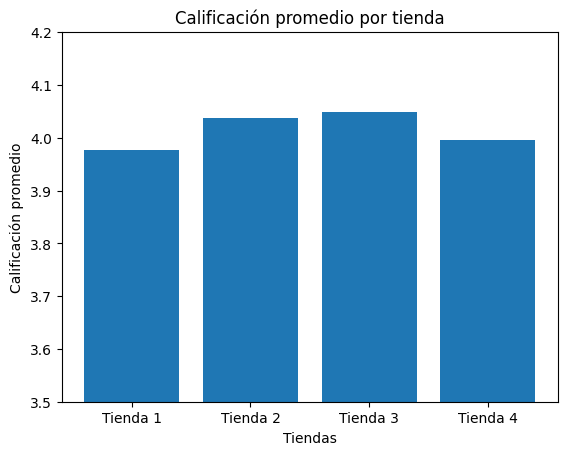

In [20]:
plt.bar(tiendas, Calificacion_promedio)
plt.xlabel("Tiendas")
plt.ylabel("Calificación promedio")
plt.title("Calificación promedio por tienda")
plt.ylim(3.5, 4.2)
plt.show()

# 4. Productos más y menos vendidos

Tienda 1 tiene ['Microondas'] como productos mas vendidos y tiene ['Celular ABXY'] como productos que no venden
Tienda 2 tiene ['Iniciando en programación'] como productos mas vendidos y tiene ['Juego de mesa'] como productos que no venden
Tienda 3 tiene ['Kit de bancas'] como productos mas vendidos y tiene ['Bloques de construcción'] como productos que no venden
Tienda 4 tiene ['Cama box'] como productos mas vendidos y tiene ['Guitarra eléctrica'] como productos que no venden


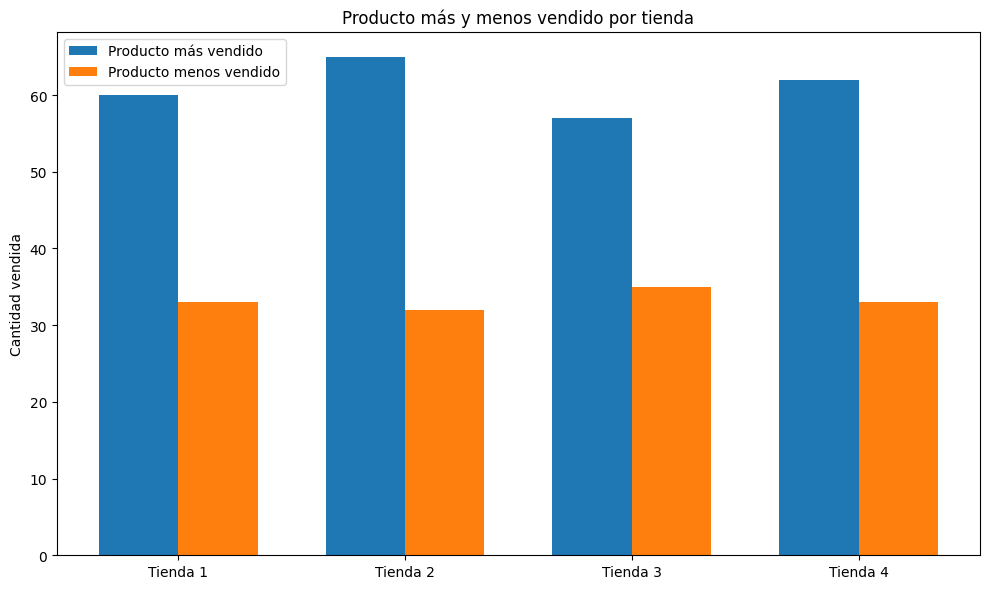

In [21]:
Conteos_producto = []
Productos_mas_populares = []
Productos_menos_populares = []
Cantidad_mas_vendida = []
Cantidad_menos_vendida = []
i = 1
for df in Datos_generales:
  Conteo = df["Producto"].value_counts()
  Conteos_producto.append(Conteo)
  Productos_pop = Conteo.head(1).index.tolist()
  Productos_no_pop = Conteo.tail(1).index.tolist()
  Productos_mas_populares.append(Productos_pop)
  Productos_menos_populares.append(Productos_no_pop)
  print(f"Tienda {i} tiene {Productos_pop} como productos mas vendidos y tiene {Productos_no_pop} como productos que no venden")
  i+=1
for conteo in Conteos_producto:
  Cantidad_mas_vendida.append(conteo.max())
  Cantidad_menos_vendida.append(conteo.min())

x = np.arange(len(tiendas))
width = 0.35

plt.figure(figsize=(10,6))

plt.bar(x - width/2, Cantidad_mas_vendida, width, label="Producto más vendido")
plt.bar(x + width/2, Cantidad_menos_vendida, width, label="Producto menos vendido")

plt.xticks(x, tiendas)
plt.ylabel("Cantidad vendida")
plt.title("Producto más y menos vendido por tienda")
plt.legend()

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [22]:
Costo_envio_promedio = []
Costo_envio_total = []
i = 1
for df in Datos_generales:
  envio = df["Costo de envío"].mean()
  Costo_envio_promedio.append(envio)
  Costo_envio_total.append(df["Costo de envío"].sum())
  print(f"Tienda {i} tiene un costo de envio promedio de {envio:.2f}")
  i+=1
print (Costo_envio_total)
ingresos_neto = [[ingreso - costo] for ingreso, costo in zip(ingresos_generales, Costo_envio_total)]
print(ingresos_neto)

Tienda 1 tiene un costo de envio promedio de 26018.61
Tienda 2 tiene un costo de envio promedio de 25216.24
Tienda 3 tiene un costo de envio promedio de 24805.68
Tienda 4 tiene un costo de envio promedio de 23459.46
[np.float64(61377900.0), np.float64(59485100.0), np.float64(58516600.0), np.float64(55317400.0)]
[[np.float64(1089502500.0)], [np.float64(1056858400.0)], [np.float64(1039503000.0)], [np.float64(983058300.0)]]


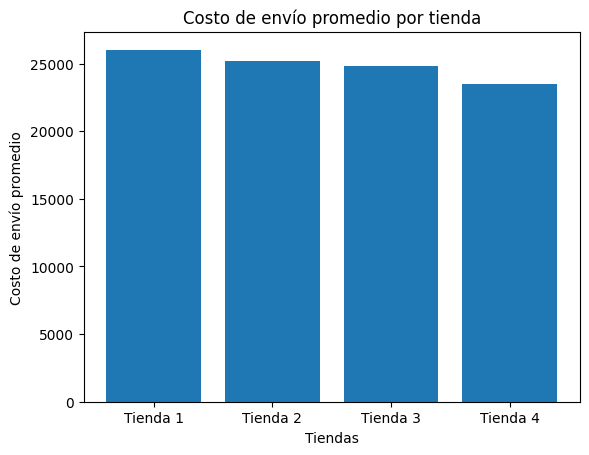

In [23]:
plt.bar(tiendas, Costo_envio_promedio)
plt.xlabel("Tiendas")
plt.ylabel("Costo de envío promedio")
plt.title("Costo de envío promedio por tienda")
plt.show()


#Informer Final

El objetivo de este estudio es verificar el rendimiento de las cuatro tiendas que posee el Sr. Juan, con el fin de determinar cuál de ellas debería ser elegida para su venta. Para ello, se analizaron los ingresos totales, las ventas por categorías, la calificación promedio de cada tienda, los productos más y menos vendidos, así como el costo promedio de envío de cada una.

En el primer paso del análisis, se realizó un cálculo del ingreso total por tienda. Como se puede apreciar en los resultados y en la gráfica que los acompaña, la tienda con mejor desempeño en ventas fue la tienda número uno, seguida por la número dos, tres y cuatro. La diferencia en ganancias entre las tiendas oscila entre los 18 millones y los 59 millones.

En el segundo paso del análisis se identificaron las categorías más populares entre los compradores de las cuatro tiendas. Se determinó que, en todas ellas, las categorías más vendidas fueron Muebles, Electrónicos y Juguetes. Los datos obtenidos, que pueden evidenciarse en las gráficas, muestran que en la categoría más vendida, Muebles, la tienda número tres es la que ha tenido el mejor desempeño. En la categoría de Electrónicos, solo la tienda número dos presenta un desempeño menor en comparación con las demás. Finalmente, en la categoría de Juguetes, la tienda número cuatro fue la que obtuvo el mejor desempeño, seguida por la número uno, mientras que las otras dos tuvieron un comportamiento similar.

En el tercer paso se obtuvo el promedio de la calificación de satisfacción otorgada por los clientes en cada una de las compras realizadas. Como se puede observar en el gráfico, la tienda mejor calificada fue la tienda número tres.

En el cuarto paso del análisis se buscó identificar el producto más vendido y el menos vendido por tienda. Para tener una mayor claridad sobre el impacto de estos productos en cada tienda, se extrajo el precio por unidad de cada uno. De las cuatro tiendas, la tienda número uno cuenta con el producto más vendido y el menos vendido con mayor costo; sin embargo, la tienda número dos es la que presenta un mejor desempeño en términos de cantidad vendida.

Finalmente, se calculó el costo promedio que paga cada tienda por el envío de sus productos a los clientes. En promedio, la tienda con el mayor costo de envío es la tienda número uno, mientras que la de menor costo promedio es la tienda número cuatro. Asimismo, se decidió calcular el costo total de envío para tener una idea más clara de cómo este afecta los ingresos generales de las tiendas.

La conclusión a la que se llegó, tomando en cuenta todos los factores analizados anteriormente, es que la tienda que el Sr. Juan debería vender es la tienda número cuatro. Esta es la que genera menores ingresos, a pesar de contar con un bajo costo promedio de envío. Además, presenta un comportamiento bastante similar al de las demás tiendas en las categorías mejor vendidas, por lo que su problema principal se encuentra en las otras categorías. En general, las cuatro tiendas muestran un comportamiento similar, por lo que el factor determinante para la decisión es el ingreso total.